In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os

In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [4]:
# go warriors!
IMAGE_PATH = 'warriors.jpg'
!wget 'https://cdn.vox-cdn.com/thumbor/rC0mlBATZdoDW1tEa44P6431sGc=/0x0:3683x2455/1200x800/filters:focal(1623x234:2211x822)/cdn.vox-cdn.com/uploads/chorus_image/image/63273148/usa_today_12005182.0.jpg' -O {IMAGE_PATH}

--2021-02-07 04:53:23--  https://cdn.vox-cdn.com/thumbor/rC0mlBATZdoDW1tEa44P6431sGc=/0x0:3683x2455/1200x800/filters:focal(1623x234:2211x822)/cdn.vox-cdn.com/uploads/chorus_image/image/63273148/usa_today_12005182.0.jpg
Resolving cdn.vox-cdn.com (cdn.vox-cdn.com)... 151.101.40.124
Connecting to cdn.vox-cdn.com (cdn.vox-cdn.com)|151.101.40.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116503 (114K) [image/jpeg]
Saving to: 'warriors.jpg'

warriors.jpg        100%[===================>] 113.77K  --.-KB/s    in 0.03s   

2021-02-07 04:53:23 (3.92 MB/s) - 'warriors.jpg' saved [116503/116503]



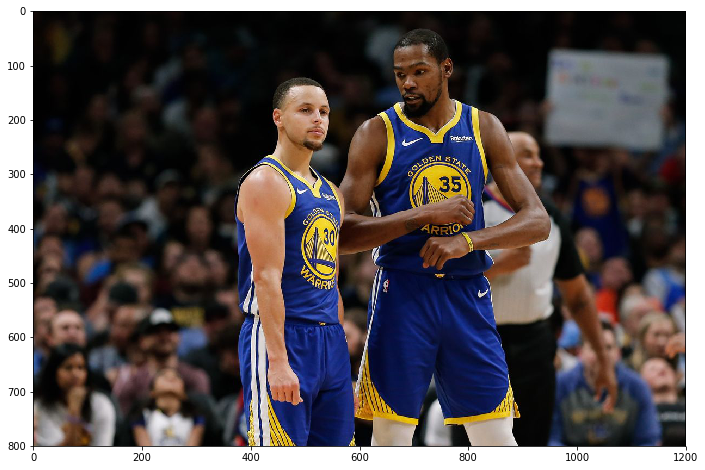

In [5]:
image = Image.open(IMAGE_PATH)
plt.figure(figsize=(12, 8))
plt.imshow(image)
# plt.axis('off')

In [6]:
# Create face detector
mtcnn = MTCNN(keep_all=True, device=device)

In [7]:
# Detect face
boxes, probs, landmarks = mtcnn.detect(image, landmarks=True)

/usr/lib/python3/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


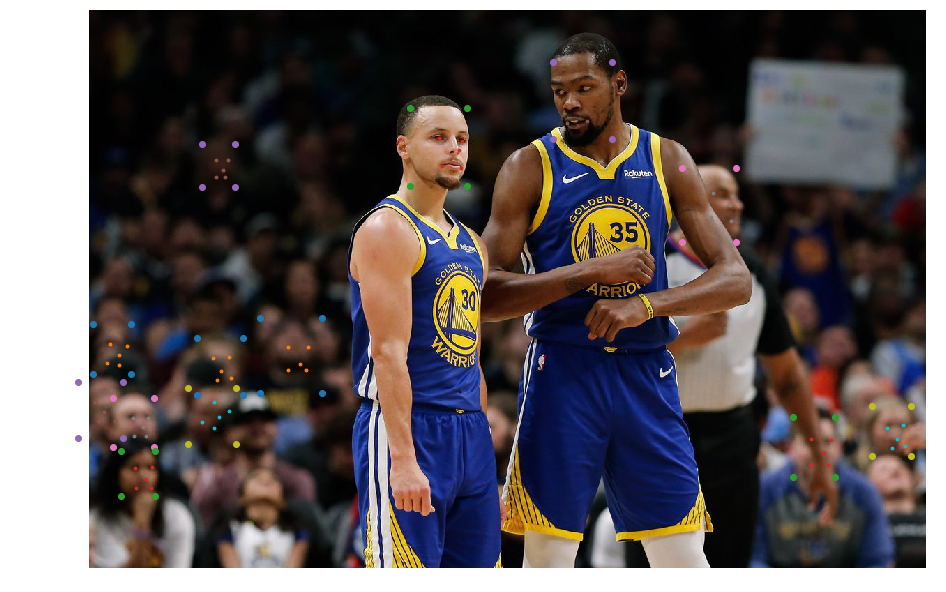

In [8]:
# Visualize
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(image)
ax.axis('off')

for box, landmark in zip(boxes, landmarks):
    ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8)
fig.show()

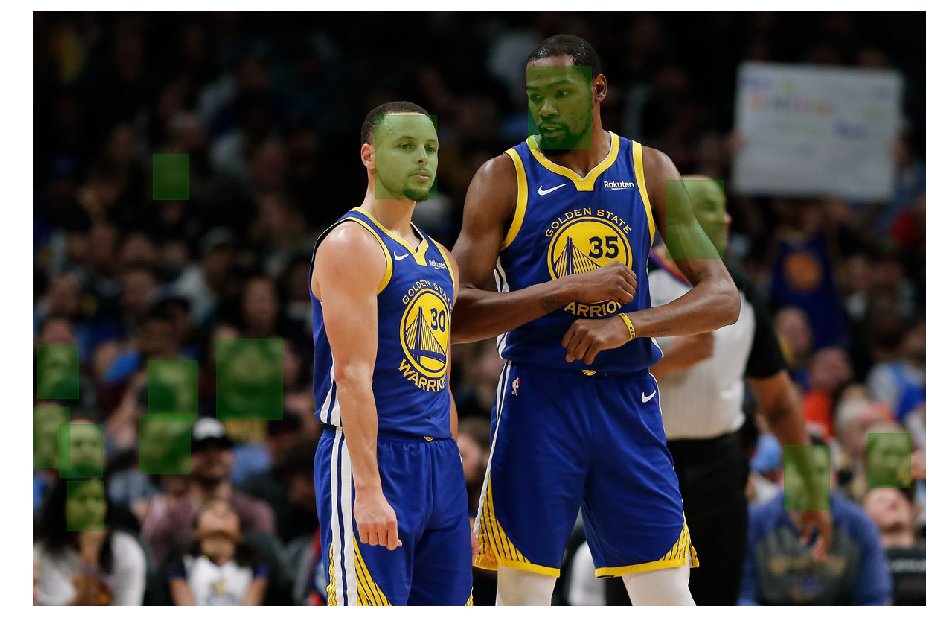

In [9]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(image)
ax.axis('off')

for box, landmark in zip(boxes, landmarks):
        # display rectangle
    patch = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], color='g', alpha=0.3)
    ax.add_patch(patch)
fig.show()

In [13]:
%%time
for i in range(1,10):
    # Detect face
  boxes, probs, landmarks = mtcnn.detect(image, landmarks=True)

CPU times: user 5.92 s, sys: 204 ms, total: 6.12 s
Wall time: 6.87 s


In [14]:
mtcnn = MTCNN(keep_all=True, device='cpu')

In [15]:
%%time
for i in range(1,10):
    # Detect face
  boxes, probs, landmarks = mtcnn.detect(image, landmarks=True)

CPU times: user 2min 58s, sys: 3.6 s, total: 3min 1s
Wall time: 41 s
